In [6]:
connections = {x[0]: set(x[1]['ID']) for x in fed}
connections

{'AHO': {1018000, 1020870, 1039830, 3902773},
 'ALB': {821322},
 'ALG': {26028450},
 'AND': {400106,
  1902873,
  2201224,
  2207753,
  2222345,
  2260409,
  4617738,
  22260617,
  22270728},
 'ARG': {32041667},
 'ARM': {310204, 4129709, 13300474, 13300610, 14112035},
 'ARU': {7500114},
 'AUS': {408697,
  910775,
  1207075,
  2200341,
  2600536,
  2804395,
  4300033,
  4300475,
  4300726,
  4800206,
  5088240,
  5201179,
  5803837,
  9900608,
  10604006,
  12400980,
  13501151,
  25004301},
 'AUT': {724971,
  743763,
  786519,
  786527,
  929697,
  1123645,
  1239171,
  1613782,
  2900262,
  4621760,
  4629400,
  11800097,
  12000051,
  12000086,
  12500259,
  12996300,
  13601270,
  13603817,
  14142368,
  14508630,
  14902052},
 'AZE': {4650891, 13401033, 13401416},
 'BAN': {11600098},
 'BEL': {200930,
  208078,
  1024523,
  1032976,
  1032984,
  1206265,
  2811788,
  4700481,
  13300865,
  13401416,
  14102110,
  14104202,
  14104946},
 'BER': {14901510},
 'BIH': {901512,
  902969,


In [ ]:
conda install -c marufr python-igraph

In [ ]:
conda install -c conda-forge python-igraph

In [ ]:
conda install -c conda-forge/label/gcc7 python-igraph

In [ ]:
conda install -c conda-forge/label/cf201901 python-igraph

In [ ]:
conda install -c conda-forge/label/cf202003 python-igraph

In [1]:
import pandas as pd
import numpy as np
import spacy

import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt

from urllib.request import urlopen

In [2]:
from collections import Counter,OrderedDict

# Q1

## Chess Transfers

For this question we are going to use the following dataset:

In [367]:
chess = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/chess-transfers/transfers.csv')
chess

,url,ID,Federation,Form.Fed,Transfer Date
0,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
1,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
2,https://ratings.fide.com/fedchange.phtml?year=...,14401762,BIH,YUG,1/31/00
3,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
4,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
...,...,...,...,...,...
927,https://ratings.fide.com/fedchange.phtml?year=...,1628313,GER,AUT,1/9/17
928,https://ratings.fide.com/fedchange.phtml?year=...,5200393,SGP,PHI,1/11/17
929,https://ratings.fide.com/fedchange.phtml?year=...,2002515,POL,USA,1/9/17
930,https://ratings.fide.com/fedchange.phtml?year=...,407747,SCO,ENG,1/12/17


The data shows chess grand masters moving one chess federation to another chess federation.

1. Calculate the number of chess masters moved to each federation. You must obtain a pandas data frame with two columns: Federation name and the number of grand masters moved into that specific federation.
2. Sort the table (highest to the lowest.)
3. DIsplay the top 10 federations as a bar chart.
4. Construct a python dictionary where the keys are pairs of federations (A,B) and the values are number of times grand masters moved from federation A to federation B.
5. Filter the dictionary and retain only the pairs that appear 5 or more times.
6. Constuct a **directed** `networkx` graph from the keys of the dictionary you constructed in step 5.
7. Display the graph.

First we check data.

In [368]:
chess.loc[chess['ID']==14401754]

,url,ID,Federation,Form.Fed,Transfer Date
1,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
4,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
471,https://ratings.fide.com/fedchange.phtml?year=...,14401754,CRO,BIH,12/16/10


We figure out that there are duplicating rows in data. So we will remove them first.

In [369]:
chess = chess.drop_duplicates()
chess.head()

,url,ID,Federation,Form.Fed,Transfer Date
0,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
1,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
2,https://ratings.fide.com/fedchange.phtml?year=...,14401762,BIH,YUG,1/31/00
6,https://ratings.fide.com/fedchange.phtml?year=...,6700284,ESA,HON,11/15/01
7,https://ratings.fide.com/fedchange.phtml?year=...,1613782,AUT,ISR,7/9/01


We sort the table from highest to the lowest.

In [371]:
edges = Counter([(x,y) for x,y in zip(chess['Federation'],chess['Form.Fed'])])
edges
y = OrderedDict(edges.most_common())
y

OrderedDict([(('MNC', 'FRA'), 17),
             (('BIH', 'SRB'), 16),
             (('RUS', 'UKR'), 12),
             (('GER', 'RUS'), 11),
             (('GER', 'UKR'), 10),
             (('USA', 'IND'), 10),
             (('CRO', 'SCG'), 8),
             (('CZE', 'SVK'), 8),
             (('BIH', 'CRO'), 7),
             (('CZE', 'RUS'), 7),
             (('CRO', 'BIH'), 7),
             (('WLS', 'ENG'), 7),
             (('TUR', 'AZE'), 7),
             (('SUI', 'GER'), 6),
             (('UKR', 'RUS'), 6),
             (('AND', 'ESP'), 6),
             (('CRO', 'SRB'), 6),
             (('FRA', 'ROU'), 6),
             (('USA', 'UKR'), 5),
             (('CAN', 'ISR'), 5),
             (('USA', 'CUB'), 5),
             (('ESP', 'CUB'), 5),
             (('SIN', 'CHN'), 5),
             (('USA', 'PHI'), 4),
             (('USA', 'RUS'), 4),
             (('USA', 'ARM'), 4),
             (('ISR', 'RUS'), 4),
             (('LIE', 'GER'), 4),
             (('TUR', 'GER'), 4),
        

In [372]:
v = [ str((x[0],x[1])) for x in ks]

In [373]:
chess.loc[(chess['Federation']=='BIH') & (chess['Form.Fed']=='SRB')]

,url,ID,Federation,Form.Fed,Transfer Date
356,https://ratings.fide.com/fedchange.phtml?year=...,926710,BIH,SRB,6/6/08
358,https://ratings.fide.com/fedchange.phtml?year=...,927252,BIH,SRB,6/6/08
366,https://ratings.fide.com/fedchange.phtml?year=...,929646,BIH,SRB,6/6/08
385,https://ratings.fide.com/fedchange.phtml?year=...,934160,BIH,SRB,6/6/08
387,https://ratings.fide.com/fedchange.phtml?year=...,930075,BIH,SRB,6/6/08
388,https://ratings.fide.com/fedchange.phtml?year=...,909017,BIH,SRB,6/6/08
394,https://ratings.fide.com/fedchange.phtml?year=...,932027,BIH,SRB,3/19/08
459,https://ratings.fide.com/fedchange.phtml?year=...,904422,BIH,SRB,7/2/10
466,https://ratings.fide.com/fedchange.phtml?year=...,929239,BIH,SRB,4/7/10
479,https://ratings.fide.com/fedchange.phtml?year=...,913979,BIH,SRB,7/2/10


In [374]:
z = [(x,y[x]) for x in y]
orderedDf = pd.DataFrame(z)
dtTop10=orderedDf.head(10)
dtTop10

,0,1
0,"(MNC, FRA)",17
1,"(BIH, SRB)",16
2,"(RUS, UKR)",12
3,"(GER, RUS)",11
4,"(GER, UKR)",10
5,"(USA, IND)",10
6,"(CRO, SCG)",8
7,"(CZE, SVK)",8
8,"(BIH, CRO)",7
9,"(CZE, RUS)",7


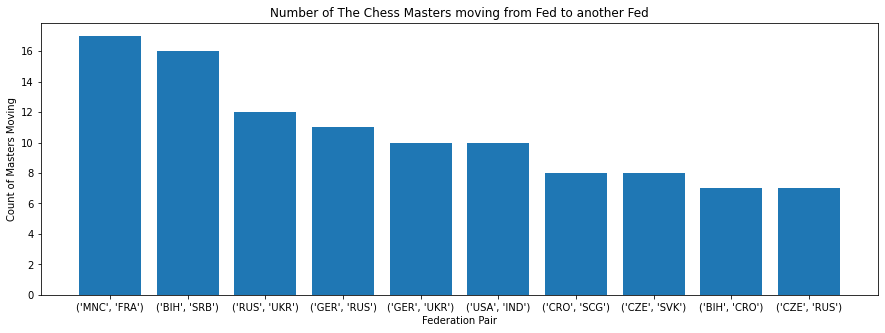

In [386]:
ks = [ str((x[0],x[1])) for x in list(dtTop10.iloc[:,0])]
vs = list(dtTop10.iloc[:,1])

plt.bar(ks,vs)
plt.title('Number of The Chess Masters moving from Fed to another Fed')
plt.xlabel('Federation Pair')
plt.ylabel('Count of Masters Moving')
plt.rcParams['figure.figsize'] = 15,5
plt.show()

In [46]:
z = [(x[0],x[1],y[x]) for x in y]
orderedDf = pd.DataFrame(z)
orderedDf

,0,1,2
0,MNC,FRA,17
1,BIH,SRB,16
2,RUS,UKR,12
3,GER,RUS,11
4,GER,UKR,10
...,...,...,...
441,PAN,COL,1
442,BLR,AUS,1
443,SGP,PHI,1
444,POL,USA,1


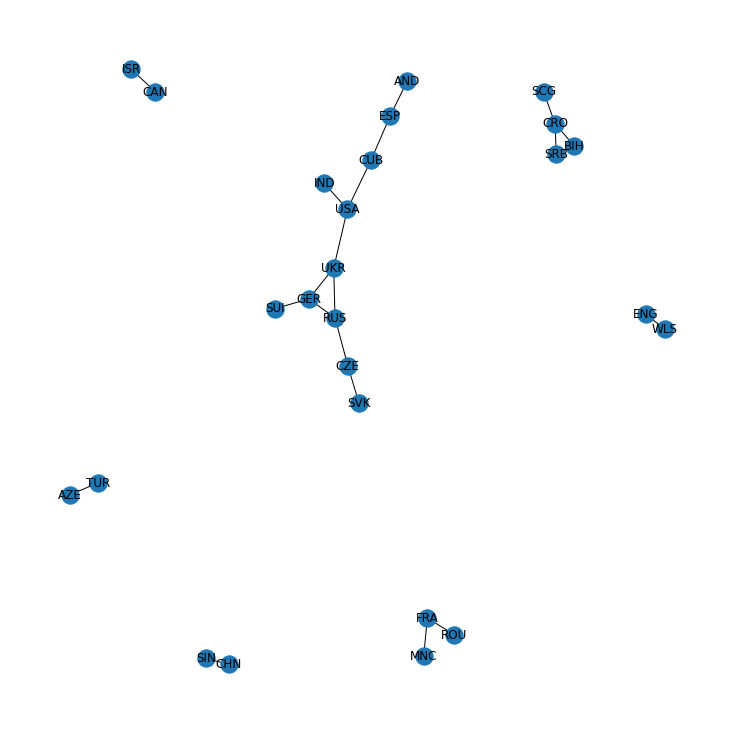

In [387]:
HiringGraph = nx.from_edgelist([x for x,y in edges.items() if y>=5 and x[0]!=x[1]])
plt.figure(figsize=(10,10))
nx.draw_spring(HiringGraph,with_labels=True)

# Q2

## NBA Players

For this question we are going to use the following dataset:

In [3]:
NBA = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')
NBA

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,1629059,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582463,431,1,9,634,21801037,NaN,NaN,0:04,4,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cavaliers Timeout: Regular (Reg.6 Short 0),10:49 PM
582464,432,0,8,635,21801037,NaN,NaN,0:04,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Clarkson FOR Zizic,10:50 PM
582465,433,63,2,638,21801037,NaN,NaN,0:02,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Stauskas 24' 3PT Fadeaway Jumper,10:51 PM
582466,434,0,4,639,21801037,Kleber REBOUND (Off:5 Def:7),NaN,0:02,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:51 PM


The data contains play-by-play information about all games from the 2018-2019 NBA season. We are interested in the columns 'PLAYER1_ID', 'PLAYER1_NAME', 'PLAYER2_ID', 'PLAYER2_NAME', 'PLAYER3_ID', 'PLAYER3_NAME'. If the specific entry involves two or more players PLAYER2_ID, PLAYER2_NAME, PLAYER3_ID, PLAYER3_NAME are going to be non-empty. 

1. Construct a list of pairs that contains pairs of player names in interaction. If the play-by-play involves 3 players A,B and C you must have 3 entries: (A,B), (A,C) and (B,C) (write the pairs in the dictionary order).
2. Construct a python  dictionary where the keys are pairs of player names and the values are the number of times each pair appears in the list you constructed in step 1.
3. Filter the list and keep only the entries that appear more than 74 times (i.e. 75 or more).
4. Construct a `igraph` graph from the data you obtained from step 3.
5. Display the graph.
6. List the maximal cliques using the `maximal_cliques` of the graph data structure.

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

I pick the data where there are infos about Player2 and Player3.

In [5]:
condition1 = ~(NBA['PLAYER2_NAME'].isnull())
condiiton2 = (NBA['PLAYER2_ID'] != 0)
condition3 = ~(NBA['PLAYER3_NAME'].isnull())
condition4 = (NBA['PLAYER3_ID'] != 0)

#newNBA = NBA.loc[condition1 & condition2 & condition3 & condition4]
newNBA = NBA.loc[ condition1 | condition3 ]
newNBA

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,PERSON2TYPE,PERSON3TYPE,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ABBREVIATION,PLAYER1_TEAM_CITY,PLAYER1_TEAM_ID,PLAYER1_TEAM_NICKNAME,PLAYER2_ID,PLAYER2_NAME,PLAYER2_TEAM_ABBREVIATION,PLAYER2_TEAM_CITY,PLAYER2_TEAM_ID,PLAYER2_TEAM_NICKNAME,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,5,4,1629028,Deandre Ayton,PHX,Phoenix,1.610613e+09,Suns,202702,Kenneth Faried,HOU,Houston,1.610613e+09,Rockets,1629059,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,5,0,1628367,Josh Jackson,PHX,Phoenix,1.610613e+09,Suns,201935,James Harden,HOU,Houston,1.610613e+09,Rockets,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,5,1,1628969,Mikal Bridges,PHX,Phoenix,1.610613e+09,Suns,201935,James Harden,HOU,Houston,1.610613e+09,Rockets,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM
7,7,1,6,15,21800794,NaN,NaN,11:13,1,5.0,4,1,201935,James Harden,HOU,Houston,1.610613e+09,Rockets,1626164,Devin Booker,PHX,Phoenix,1.610613e+09,Suns,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden P.FOUL (P1.T1) (T.Maddox),9:13 PM
8,8,1,5,17,21800794,Okobo Bad Pass Turnover (P1.T2),NaN,11:05,1,4.0,5,0,1629059,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,203516,James Ennis III,HOU,Houston,1.610613e+09,Rockets,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ennis III STEAL (1 STL),9:13 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582457,425,0,8,624,21801037,NaN,NaN,0:05,4,5.0,5,0,1627790,Ante Zizic,CLE,Cleveland,1.610613e+09,Cavaliers,1628021,David Nwaba,CLE,Cleveland,1.610613e+09,Cavaliers,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Nwaba FOR Zizic,10:47 PM
582458,426,28,6,626,21801037,NaN,NaN,0:04,4,5.0,4,1,1626224,Cedi Osman,CLE,Cleveland,1.610613e+09,Cavaliers,2734,Devin Harris,DAL,Dallas,1.610613e+09,Mavericks,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Osman Personal Take Foul (P2.PN) (D.Taylor),10:48 PM
582460,428,0,8,629,21801037,NaN,NaN,0:04,4,5.0,5,0,1628021,David Nwaba,CLE,Cleveland,1.610613e+09,Cavaliers,1627790,Ante Zizic,CLE,Cleveland,1.610613e+09,Cavaliers,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Zizic FOR Nwaba,10:49 PM
582461,429,0,8,631,21801037,SUB: Finney-Smith FOR Nowitzki,NaN,0:04,4,4.0,4,0,1717,Dirk Nowitzki,DAL,Dallas,1.610613e+09,Mavericks,1627827,Dorian Finney-Smith,DAL,Dallas,1.610613e+09,Mavericks,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:49 PM


In [6]:
res = []
namepairs = {}
cols = ['PLAYER1_ID','PLAYER1_NAME','PLAYER2_ID','PLAYER2_NAME','PLAYER3_ID','PLAYER3_NAME']
df = newNBA[cols].reset_index()

#edges = Counter([(x,y) for x,y in zip(chess['Federation'],chess['Form.Fed'])])
#edges

for index, row in df.iterrows():
    id_player1 = row['PLAYER1_ID']
    id_player2 = row['PLAYER2_ID']
    id_player3 = row['PLAYER3_ID']
    name_player1 = row['PLAYER1_NAME']
    name_player2 = row['PLAYER2_NAME']
    name_player3 = row['PLAYER3_NAME']
    
    existPlayer2 = id_player2 != 0
    existPlayer3 = id_player3 != 0
    
    if (existPlayer2):
        tuple1 = (id_player1,id_player2)
        res.append(tuple1)
        namepairs[str(id_player1)] = name_player1
    
    if (existPlayer3):
        tuple2 = (id_player1,id_player3)
        res.append(tuple2)
        namepairs[str(id_player2)] = name_player2
    
    if (existPlayer2 & existPlayer3):
        tuple3 = (id_player2,id_player3)
        res.append(tuple3)
        namepairs[str(id_player3)] = name_player3 
        

In [7]:
res

[(1629028, 202702),
 (1629028, 1629059),
 (202702, 1629059),
 (1628367, 201935),
 (1628969, 201935),
 (201935, 1626164),
 (1629059, 203516),
 (201935, 1629028),
 (1628367, 201935),
 (1629028, 1629059),
 (202702, 101108),
 (1629059, 101108),
 (1629059, 101108),
 (101108, 1629059),
 (1629059, 101108),
 (1629028, 1629059),
 (202702, 1628367),
 (101108, 1628367),
 (1628367, 203516),
 (201935, 101108),
 (1629059, 1626162),
 (202702, 203085),
 (101108, 2403),
 (200782, 203085),
 (2403, 1626164),
 (203516, 101123),
 (1626162, 1628367),
 (201935, 1628969),
 (1626164, 1628969),
 (2403, 1629028),
 (101123, 201935),
 (1626162, 201935),
 (1626164, 1626158),
 (1629028, 2037),
 (1628969, 1629059),
 (200782, 101108),
 (2403, 203516),
 (203516, 202702),
 (101123, 1626158),
 (201935, 203516),
 (101123, 101108),
 (203085, 1626162),
 (1628367, 2037),
 (1626158, 101108),
 (1629059, 1626164),
 (1626164, 2037),
 (1626158, 1629059),
 (203085, 1626158),
 (202702, 203085),
 (1628969, 101108),
 (101123, 1626162

In [8]:
counts = Counter(res)
counts

Counter({(1629028, 202702): 1,
         (1629028, 1629059): 22,
         (202702, 1629059): 1,
         (1628367, 201935): 6,
         (1628969, 201935): 8,
         (201935, 1626164): 1,
         (1629059, 203516): 1,
         (201935, 1629028): 5,
         (202702, 101108): 31,
         (1629059, 101108): 3,
         (101108, 1629059): 1,
         (202702, 1628367): 3,
         (101108, 1628367): 1,
         (1628367, 203516): 1,
         (201935, 101108): 98,
         (1629059, 1626162): 6,
         (202702, 203085): 14,
         (101108, 2403): 5,
         (200782, 203085): 31,
         (2403, 1626164): 1,
         (203516, 101123): 22,
         (1626162, 1628367): 27,
         (201935, 1628969): 3,
         (1626164, 1628969): 42,
         (2403, 1629028): 1,
         (101123, 201935): 72,
         (1626162, 201935): 5,
         (1626164, 1626158): 14,
         (1629028, 2037): 51,
         (1628969, 1629059): 33,
         (200782, 101108): 68,
         (2403, 203516): 5,
        

In [9]:
dictEdges = {}

for x,y in counts.keys():
    if (y,x) in dictEdges:
        dictEdges[y,x] = counts[x,y] + counts[y,x]
    elif not (x,y) in dictEdges:
        dictEdges[x,y] = counts[x,y]


edges = [[x,y,dictEdges[x,y]] for x,y in dictEdges if dictEdges[x,y]>=75]
edges

[ [x,y] for x,y,z in edges]

[[201935, 101108],
 [1626164, 1628969],
 [101123, 201935],
 [200782, 101108],
 [101123, 101108],
 [1626164, 2037],
 [2037, 1628969],
 [1626158, 1629028],
 [1629028, 1626164],
 [1628969, 1628367],
 [1628367, 1626164],
 [1626162, 1626164],
 [1628367, 1629028],
 [201935, 200782],
 [1628378, 204060],
 [204060, 2594],
 [202324, 203109],
 [203497, 202324],
 [203109, 1628378],
 [204060, 1626220],
 [2594, 1626220],
 [200757, 203109],
 [203497, 1628378],
 [204060, 203109],
 [1626220, 203109],
 [201599, 1628372],
 [201599, 1629029],
 [203943, 1629011],
 [1629029, 1627827],
 [1628422, 1628995],
 [1629029, 203084],
 [202083, 1629029],
 [203939, 1629029],
 [1628467, 203939],
 [204060, 203497],
 [202324, 204060],
 [201942, 200746],
 [1627751, 200746],
 [1627854, 201942],
 [203109, 201937],
 [201942, 202722],
 [1627854, 201988],
 [202722, 201158],
 [201937, 204060],
 [201937, 1628378],
 [202324, 201937],
 [201158, 201942],
 [201937, 203497],
 [1626220, 1628378],
 [201988, 201158],
 [1627854, 200746],

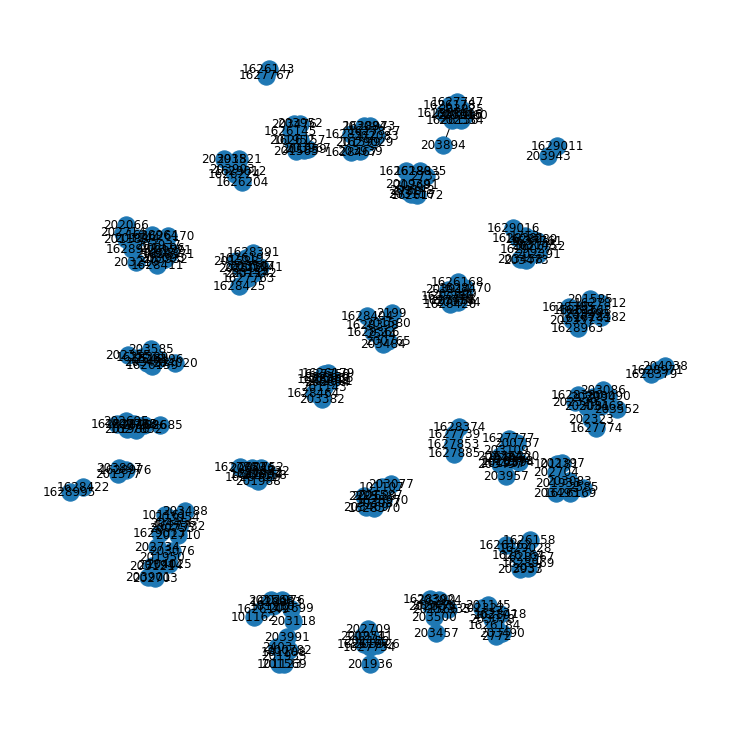

In [10]:
HiringGraph = nx.from_edgelist([(x,y) for x,y,z in edges])
plt.figure(figsize=(10,10))
nx.draw_spring(HiringGraph,with_labels=True)

In [11]:
edges

IDs = []

for x,y,z in edges:
    if not x in IDs:
        IDs.append(x)
    if not y in IDs:
        IDs.append(y)
        
IDs

[201935,
 101108,
 1626164,
 1628969,
 101123,
 200782,
 2037,
 1626158,
 1629028,
 1628367,
 1626162,
 1628378,
 204060,
 2594,
 202324,
 203109,
 203497,
 1626220,
 200757,
 201599,
 1628372,
 1629029,
 203943,
 1629011,
 1627827,
 1628422,
 1628995,
 203084,
 202083,
 203939,
 1628467,
 201942,
 200746,
 1627751,
 1627854,
 201937,
 202722,
 201988,
 201158,
 201142,
 203110,
 202691,
 203482,
 1626196,
 1626159,
 1628389,
 2548,
 1628035,
 201939,
 2738,
 2733,
 1626188,
 1626172,
 203585,
 1629012,
 1626224,
 203918,
 203903,
 1626204,
 202704,
 201933,
 203944,
 201950,
 202734,
 202703,
 203493,
 1628971,
 204038,
 203901,
 101181,
 203121,
 1629027,
 203473,
 1628989,
 203458,
 1627752,
 1627761,
 1628381,
 1713,
 203145,
 203521,
 202355,
 204020,
 203469,
 202689,
 101107,
 201587,
 203087,
 1628970,
 1628370,
 2225,
 203077,
 1626167,
 201954,
 202711,
 202709,
 201152,
 1627734,
 201936,
 201586,
 1627783,
 200768,
 201980,
 2772,
 203078,
 201145,
 1628418,
 1628384,
 2035

In [12]:
#pip install pycairo

In [13]:
strEdges = [(str(x), str(y)) for x,y,z in edges]
strIDs = [str(x) for x in IDs]

In [14]:
G = ig.Graph()

G.add_vertices(strIDs)
G.add_edges(strEdges)

strnames = [namepairs[x] for x in strIDs]
G.vs['label'] = strnames

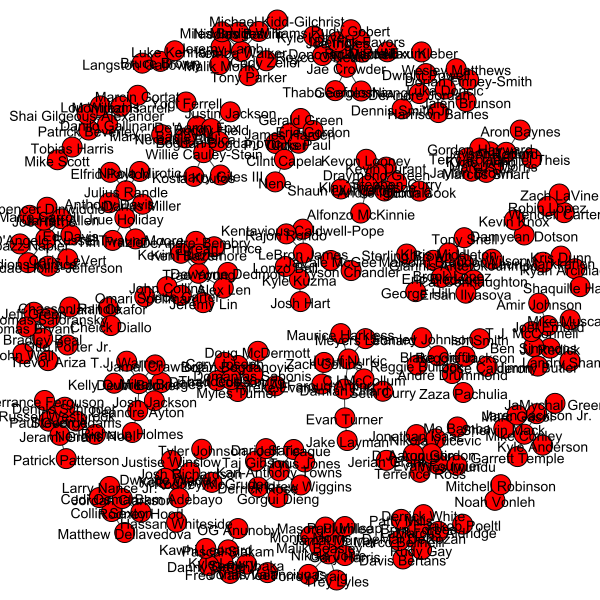

In [15]:
ig.plot(G)

When we check that Kyle Kuzma and Josh Hart are in the same team Los Angeles in the 2019 season.

In [31]:
checkdf = NBA.loc[(NBA['PLAYER1_NAME'] == 'Kyle Kuzma') | (NBA['PLAYER1_NAME']== 'Josh Hart')]
pd.unique(checkdf[['PLAYER1_NAME', 'PLAYER1_TEAM_CITY']].values.ravel('K'))

array(['Kyle Kuzma', 'Josh Hart', 'Los Angeles'], dtype=object)

# Q3

## Charles Dickens' *Great Expectations*

For this question we are going to use the following dataset:

In [4]:
with urlopen('https://www.gutenberg.org/files/1400/1400-0.txt') as f:
    raw = f.read()

greatExpectations = raw[1900:1039269].decode('utf8')

These are the names of the major characters in the novel:

In [5]:
names = [
 'Joe',
 'Pip',
 'Wopsle',
 'Hubble',
 'Pumblechook',
 'Richard',
 'Wopsle',
 'Biddy',
 'Havisham',
 'Joseph',
 'Sarah',
 'Estella',
 'Orlick',
 'Mike',
 'Wemmick',
 'Herbert',
 'Pocket',
 'Jane',
 'Flopson',
 'Coiler',
 'Drummle',
 'Jack',
 'Spider',
 'Handel',
 'Herbert',
 'Clara',
 'Skiffins',
 'Magwitch',
 'Provis',
 'Compeyson',
 'Tom',
 'Bill',
 'Barley',
 'Orlick',
 'William']

names = set(sorted(names))
names

{'Barley',
 'Biddy',
 'Bill',
 'Clara',
 'Coiler',
 'Compeyson',
 'Drummle',
 'Estella',
 'Flopson',
 'Handel',
 'Havisham',
 'Herbert',
 'Hubble',
 'Jack',
 'Jane',
 'Joe',
 'Joseph',
 'Magwitch',
 'Mike',
 'Orlick',
 'Pip',
 'Pocket',
 'Provis',
 'Pumblechook',
 'Richard',
 'Sarah',
 'Skiffins',
 'Spider',
 'Tom',
 'Wemmick',
 'William',
 'Wopsle'}

1. Split the text into sentences using a sentence tokenizer from your favorite NLP library.
2. Construct a list of pairs of names: a pair of names (A,B) appears in the list if and only if both A and B appears in the same sentence. When you store the pair (A,B) in the list make sure A appears before B in the alphabetical order.
3. Construct a python dictionary where the keys are pairs of names and values are the number of times each pair appears in the list you constructed in step 2.
4. Filter the list and retain only those pairs that appear more than twice (i.e. 3 or more).
5. Construct a `networkx` graph using the pairs you have from step 4.
6. Display the graph.